In [1]:
# feature engineering - the process of using domain knowledge to extract features from raw data via data mining techniques

In [2]:
# Outlier Considerations
# - Range and Limits
# - Percentage of Data
# -- Both are domain dependent

In [3]:
# Methodology to determine range and limits for outliers
# InterQuartile Range
# Standard Deviation
# Visualized or Domain limit value

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
def create_ages(mu = 50, sigma = 13, num_samples = 100, seed = 42):
    # Create a distribution of ages so that we can look for outliers
    np.random.seed(seed)
    sample_ages = np.random.normal(loc = mu, scale = sigma, size = num_samples)
    sample_ages = np.round(sample_ages, decimals = 0)
    
    return sample_ages

In [6]:
ages = create_ages()

In [19]:
ages

array([56., 48., 58., 70., 47., 47., 71., 60., 44., 57., 44., 44., 53.,
       25., 28., 43., 37., 54., 38., 32., 69., 47., 51., 31., 43., 51.,
       35., 55., 42., 46., 42., 74., 50., 36., 61., 34., 53., 25., 33.,
       53., 60., 52., 48., 46., 31., 41., 44., 64., 54., 27., 54., 45.,
       41., 58., 63., 62., 39., 46., 54., 63., 44., 48., 36., 34., 61.,
       68., 49., 63., 55., 42., 55., 70., 50., 70., 16., 61., 51., 46.,
       51., 24., 47., 55., 69., 43., 39., 43., 62., 54., 43., 57., 51.,
       63., 41., 46., 45., 31., 54., 53., 50., 47.])

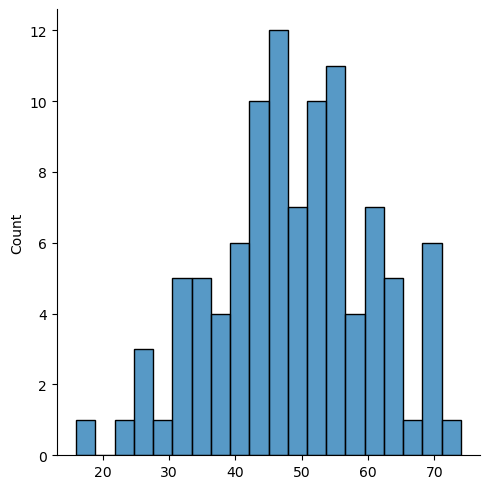

In [20]:
sns.displot(data=ages, bins = 20)
# we can see a high concentration at 70
plt.show()

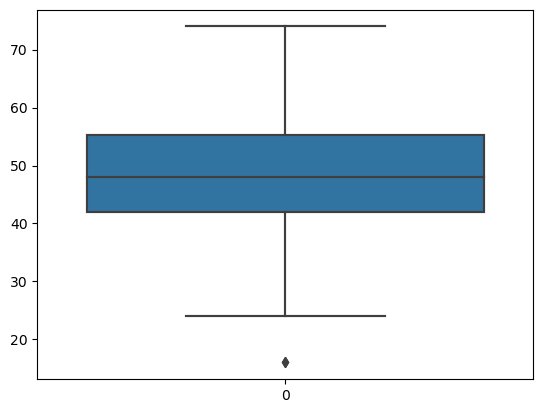

In [22]:
sns.boxplot(data = ages)
plt.show()

In [23]:
ser = pd.Series(ages)

In [24]:
ser.describe()

count    100.00000
mean      48.66000
std       11.82039
min       16.00000
25%       42.00000
50%       48.00000
75%       55.25000
max       74.00000
dtype: float64

In [40]:
q75, q25= np.percentile(ser, [75,25])
# tuple unpacking

In [41]:
IQR = q75 - q25

In [47]:
lower_limit = q25 - 1.5*IQR

22.125

In [48]:
ser[ser>lower_limit]
# length 99 
# we have filtered out the low outlier

0     56.0
1     48.0
2     58.0
3     70.0
4     47.0
      ... 
95    31.0
96    54.0
97    53.0
98    50.0
99    47.0
Length: 99, dtype: float64

In [49]:
df = pd.read_csv("C:\\Users\\Eddie\\Downloads\\UNZIP_FOR_NOTEBOOKS_FINAL\\DATA\\Ames_Housing_Data.csv")

In [50]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [55]:
df.corr()['SalePrice'].sort_values()
# every features correlation to the sale price

PID               -0.246521
Enclosed Porch    -0.128787
Kitchen AbvGr     -0.119814
Overall Cond      -0.101697
MS SubClass       -0.085092
Low Qual Fin SF   -0.037660
Bsmt Half Bath    -0.035835
Yr Sold           -0.030569
Misc Val          -0.015691
BsmtFin SF 2       0.005891
3Ssn Porch         0.032225
Mo Sold            0.035259
Pool Area          0.068403
Screen Porch       0.112151
Bedroom AbvGr      0.143913
Bsmt Unf SF        0.182855
Lot Area           0.266549
2nd Flr SF         0.269373
Bsmt Full Bath     0.276050
Half Bath          0.285056
Open Porch SF      0.312951
Wood Deck SF       0.327143
Lot Frontage       0.357318
BsmtFin SF 1       0.432914
Fireplaces         0.474558
TotRms AbvGrd      0.495474
Mas Vnr Area       0.508285
Garage Yr Blt      0.526965
Year Remod/Add     0.532974
Full Bath          0.545604
Year Built         0.558426
1st Flr SF         0.621676
Total Bsmt SF      0.632280
Garage Area        0.640401
Garage Cars        0.647877
Gr Liv Area        0

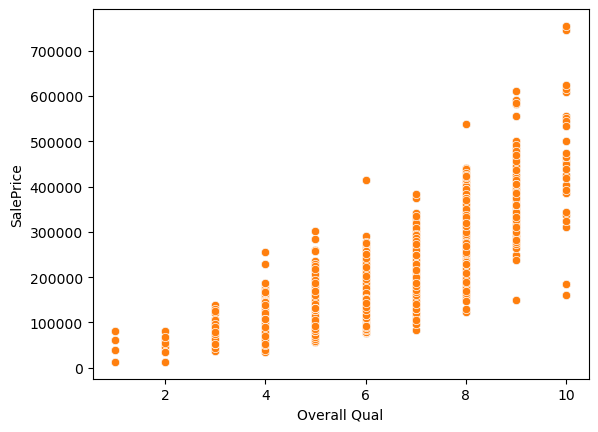

In [58]:
sns.scatterplot(data = df, x = 'Overall Qual', y ='SalePrice')
plt.show()

# We can see some outliers here already

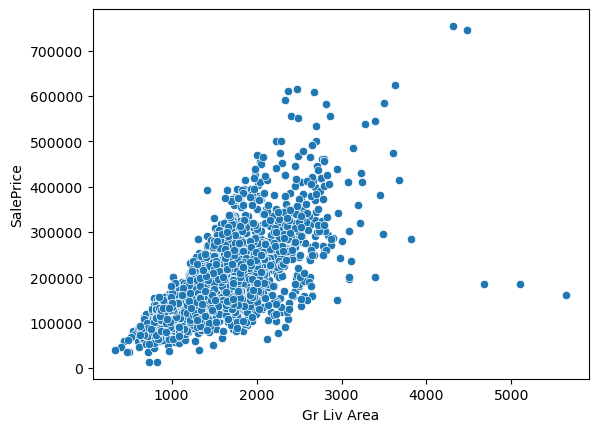

In [59]:
sns.scatterplot(data = df, x = 'Gr Liv Area', y = 'SalePrice')
plt.show()

In [64]:
# now we have a suspicion that the 3 outliers with low sale price and high GR Liv Area
# might be the same 3 outliers in the overall quality vs sale price

df[(df['Overall Qual'] > 8) & (df['SalePrice'] < 200000)][['SalePrice','Overall Qual', 'Gr Liv Area']]

# These are the types of outliers we want to remove 
# Houses that are high quality with large living areas selling for low prices
# we want the model to follow the trend that high quality & large living area = higher price

,SalePrice,Overall Qual,Gr Liv Area
1182,150000,9,2944
1498,160000,10,5642
2180,183850,10,5095
2181,184750,10,4676


In [67]:
dropindex = df[(df['Gr Liv Area'] > 4000) & (df['SalePrice'] < 400000)].index
# stores the indexes of the outliers 

In [68]:
df = df.drop(dropindex, axis = 0)

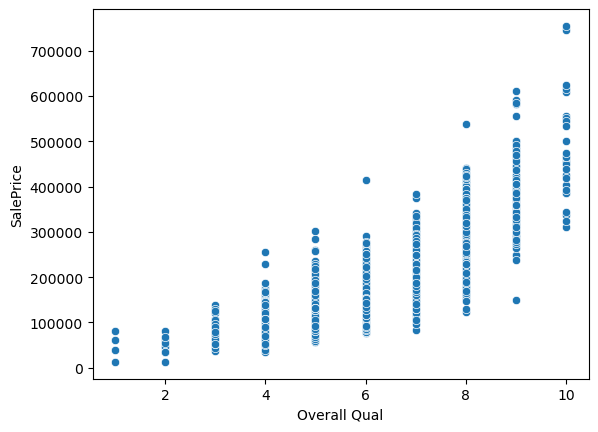

In [69]:
sns.scatterplot(data = df, x = 'Overall Qual', y ='SalePrice')
plt.show()
# Notice the outliers are gone now !

In [70]:
df.to_csv("C:\\Users\\Eddie\\Downloads\\UNZIP_FOR_NOTEBOOKS_FINAL\\DATA\\My_version_ames.csv")